In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data=pd.read_csv("heart_2022_with_nans.csv")

In [ ]:
data.head()

State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 0.0               0.0   
1  Alabama  Female     Excellent                 0.0               0.0   
2  Alabama  Female     Very good                 2.0               3.0   
3  Alabama  Female     Excellent                 0.0               0.0   
4  Alabama  Female          Fair                 2.0               0.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                 No   
1                                                NaN                 No   
2  Within past year (anytime less than 12 months ...                Yes   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0         8.0          NaN             No  ...            NaN   
1         6.0          NaN             No  ...           1.60   
2         5.0          NaN             No  ...           1.57   
3         7.0          NaN             No  ...           1.65   
4         9.0          NaN             No  ...           1.57   

  WeightInKilograms    BMI AlcoholDrinkers HIVTesting FluVaxLast12  \
0               NaN    NaN              No         No          Yes   
1             68.04  26.57              No         No           No   
2             63.50  25.61              No         No           No   
3             63.50  23.30              No         No          Yes   
4             53.98  21.77             Yes         No           No   

  PneumoVaxEver                                  TetanusLast10Tdap  \
0            No  Yes, received tetanus shot but not sure what type   
1            No  No, did not receive any tetanus shot in the pa...   
2            No                                                NaN   
3           Yes  No, did not receive any tetanus shot in the pa...   
4           Yes  No, did not receive any tetanus shot in the pa...   

  HighRiskLastYear CovidPos  
0               No       No  
1               No       No  
2               No      Yes  
3               No       No  
4               No       No  

[5 rows x 40 columns]

In [ ]:
data.shape

(445132, 40)

Our dataset contains approximately 0.445 million rows and 40 columns.

In [ ]:
data.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

***Checking mean, median, variance ,etc for all our numerical columns***

In [ ]:
data.describe()

PhysicalHealthDays  MentalHealthDays     SleepHours  HeightInMeters  \
count       434205.000000     436065.000000  439679.000000   416480.000000   
mean             4.347919          4.382649       7.022983        1.702691   
std              8.688912          8.387475       1.502425        0.107177   
min              0.000000          0.000000       1.000000        0.910000   
25%              0.000000          0.000000       6.000000        1.630000   
50%              0.000000          0.000000       7.000000        1.700000   
75%              3.000000          5.000000       8.000000        1.780000   
max             30.000000         30.000000      24.000000        2.410000   

       WeightInKilograms            BMI  
count      403054.000000  396326.000000  
mean           83.074470      28.529842  
std            21.448173       6.554889  
min            22.680000      12.020000  
25%            68.040000      24.130000  
50%            80.740000      27.440000  
75%            95.250000      31.750000  
max           292.570000      99.640000

***Checking description of our categorical features or columns***

In [ ]:
categorical_description = data.describe(include=['object', 'category'])
categorical_description

State     Sex GeneralHealth  \
count       445132  445132        443934   
unique          54       2             5   
top     Washington  Female     Very good   
freq         26152  235893        148444   

                                          LastCheckupTime PhysicalActivities  \
count                                              436824             444039   
unique                                                  4                  2   
top     Within past year (anytime less than 12 months ...                Yes   
freq                                               350944             337559   

        RemovedTeeth HadHeartAttack HadAngina HadStroke HadAsthma  ...  \
count         433772         442067    440727    443575    443359  ...   
unique             4              2         2         2         2  ...   
top     None of them             No        No        No        No  ...   
freq          233455         416959    414176    424336    376665  ...   

       ChestScan     RaceEthnicityCategory   AgeCategory AlcoholDrinkers  \
count     389086                    431075        436053          398558   
unique         2                         5            13               2   
top           No  White only, Non-Hispanic  Age 65 to 69             Yes   
freq      223221                    320421         47099          210891   

       HIVTesting FluVaxLast12 PneumoVaxEver  \
count      379005       398011        368092   
unique          2            2             2   
top            No          Yes            No   
freq       249919       209256        215604   

                                        TetanusLast10Tdap HighRiskLastYear  \
count                                              362616           394509   
unique                                                  4                2   
top     No, did not receive any tetanus shot in the pa...               No   
freq                                               121493           377324   

       CovidPos  
count    394368  
unique        3  
top          No  
freq     270055  

[4 rows x 34 columns]

# ***Checking distribution of our numerical columns before cleaning***

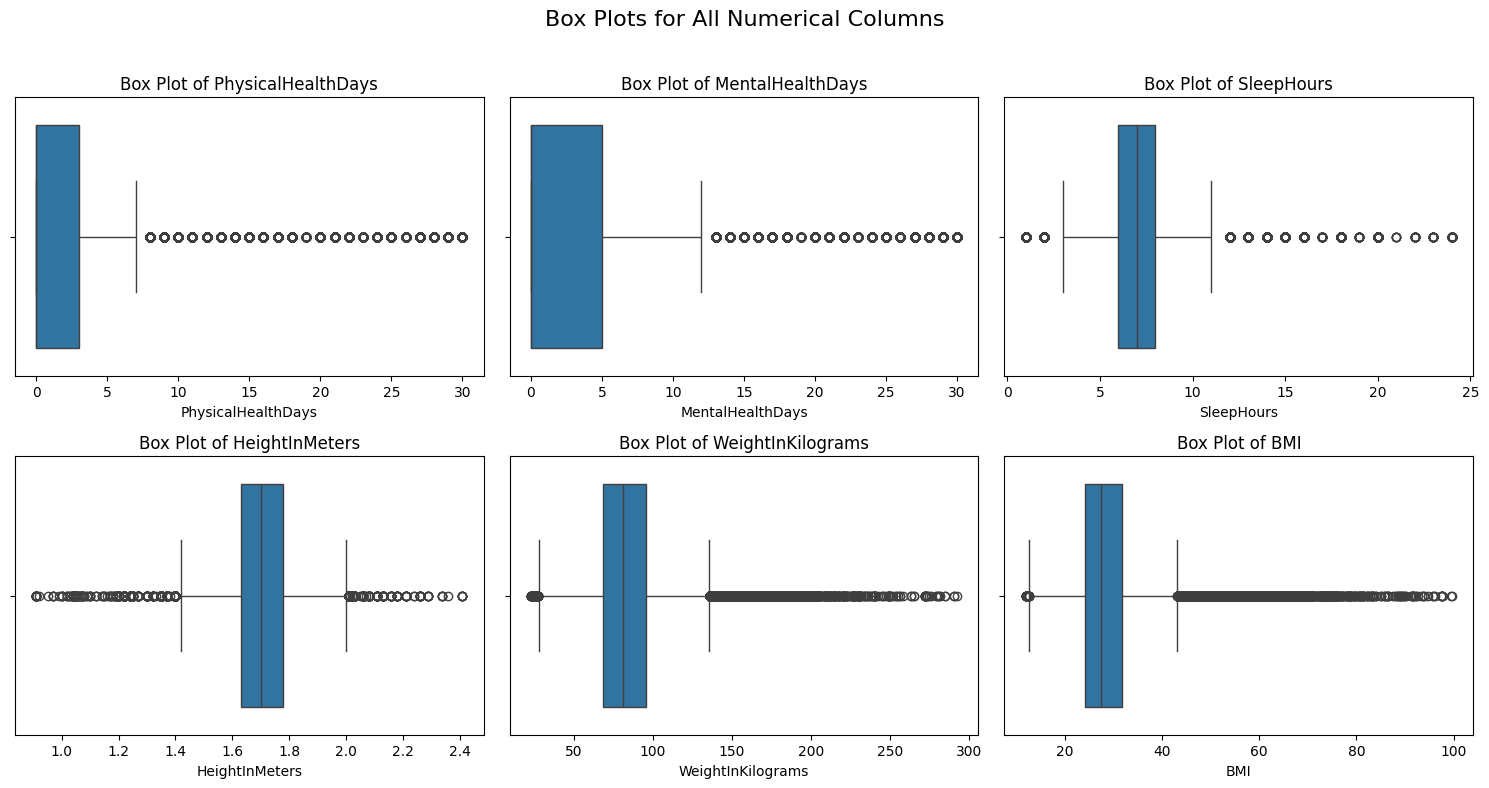

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

num_cols = 3
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
fig.suptitle('Box Plots for All Numerical Columns', fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


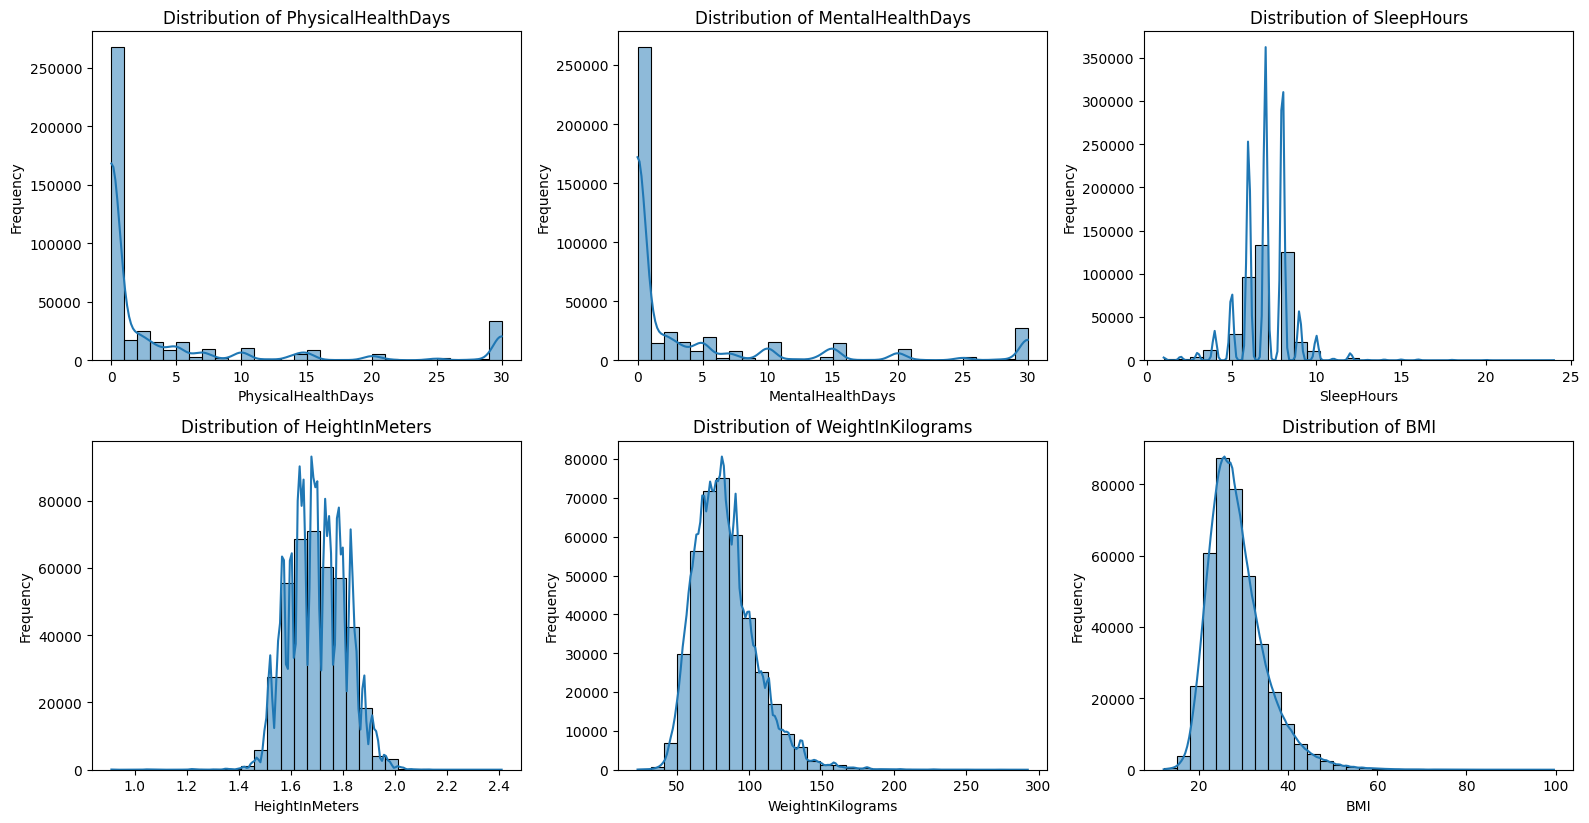

In [ ]:

# Select only numerical columns from the dataset
numerical_columns = data.select_dtypes(include='number').columns

# Setting up the plotting area
plt.figure(figsize=(16, 12))

# Create a histogram with a KDE curve for each numerical column
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


By seeing above graph , we can tell that which column is normally distributed or skewed. So HeighInMeters is normally distributed while other column are skewed

# ***Checking distribution of our categorical columns before cleaning***

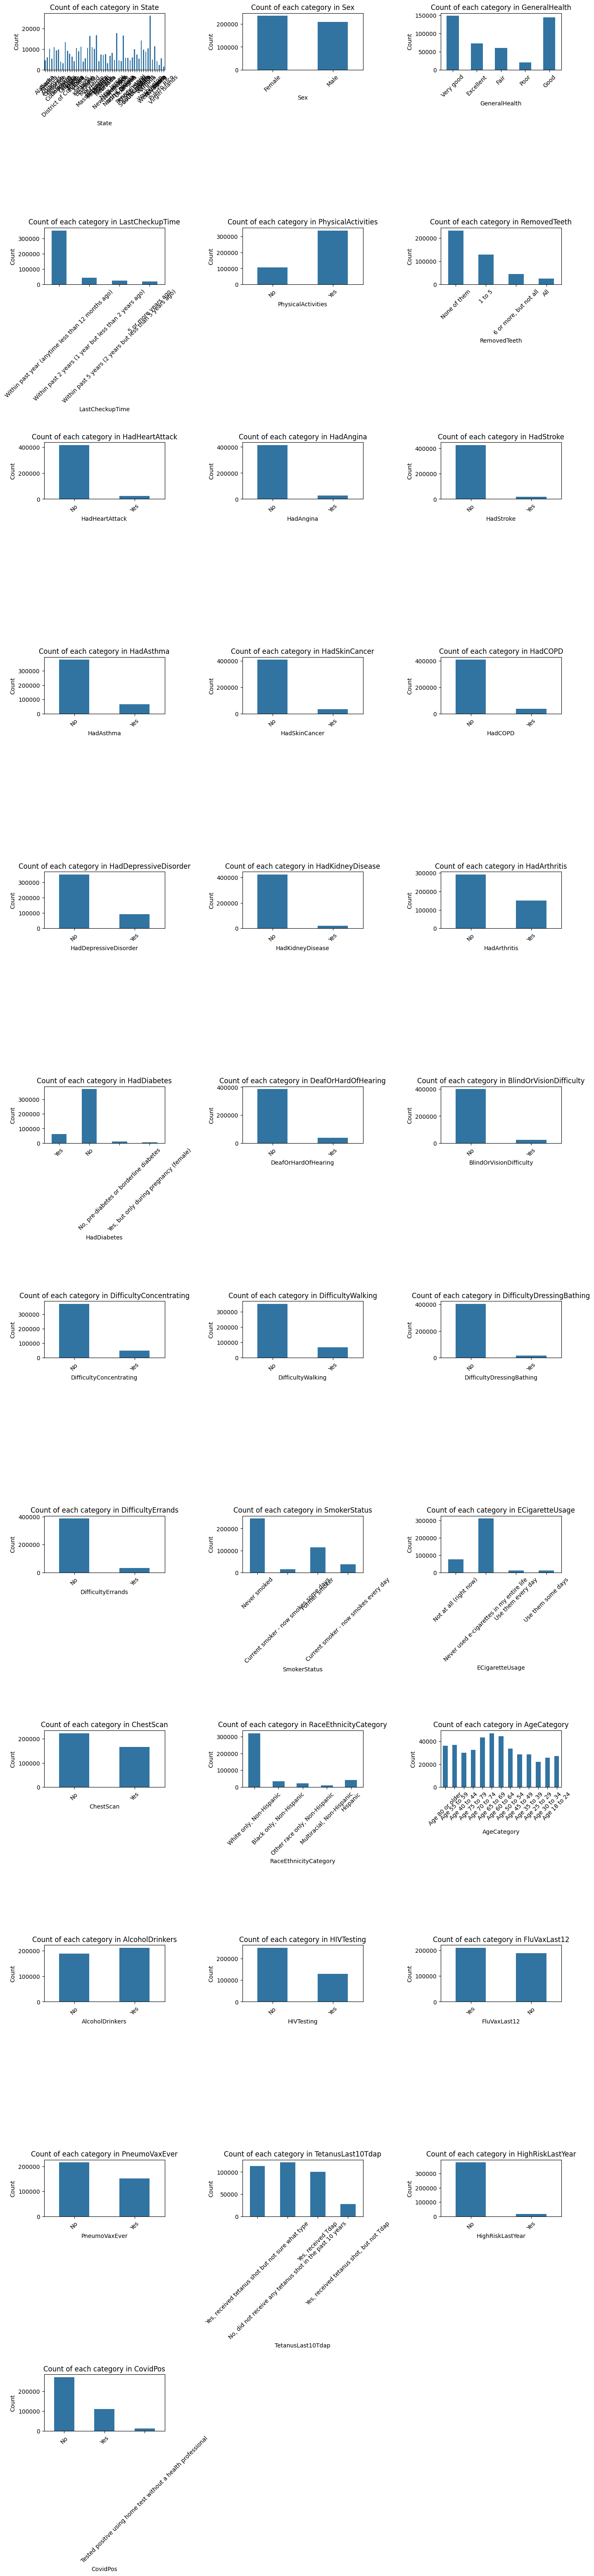

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = data.select_dtypes(include='object').columns

n_rows = (len(categorical_columns) + 1) // 2  # Ensures an extra row if there's an odd number of columns

# Set up the plotting area
plt.figure(figsize=(14, n_rows * 5))

# Create a bar chart for each categorical column
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(n_rows, 3, i)
    sns.countplot(data=data, x=col, width=0.5)
    plt.title(f'Count of each category in {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout(h_pad=3, w_pad=3)  # Add padding between plots
plt.show()


# ***Data Cleaning***

***`Checking how many null values are present in each column `***

In [ ]:
nan_count = data.isna().sum()
nan_count

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategory        14057
AgeCategory                   9079
HeightInMeters               28652
WeightInKilograms            42078
BMI                          48806
AlcoholDrinkers              46574
HIVTesting                   66127
FluVaxLast12                 47121
PneumoVaxEver                77040
TetanusLast10Tdap            82516
HighRiskLastYear             50623
CovidPos                     50764
dtype: int64

We decided to replace the null values with the mean of the respective numerical columns ('HeightInMeters', 'WeightInKilograms', 'BMI', and 'SleepHours') because we consider these features to be highly important. Dropping rows with missing values in these columns would result in losing valuable data, so imputing the missing values with the mean ensures we retain the information.

In [ ]:
l=['HeightInMeters','WeightInKilograms','BMI','SleepHours']
for column in l:
    data[column].fillna(data[column].mean(), inplace=True)

<ipython-input-13-d6c29976a840>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


After replacing the null values with the mean, we re-checked each column to ensure there are no remaining null values.

In [ ]:
data.isna().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                       0
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategory        14057
AgeCategory                   9079
HeightInMeters                   0
WeightInKilograms                0
BMI                              0
AlcoholDrinkers              46574
HIVTesting                   66127
FluVaxLast12                 47121
PneumoVaxEver                77040
TetanusLast10Tdap            82516
HighRiskLastYear             50623
CovidPos                     50764
dtype: int64

now we are taking that categorical column which has very few null values  and replacing with their particular mode value

In [ ]:
columns_with_nan = [
    'HadAngina',
    'HadStroke',
    'HadAsthma',
    'HadSkinCancer',
    'HadCOPD',
    'HadDepressiveDisorder',
    'HadKidneyDisease',
    'HadArthritis',
    'HadDiabetes',
    'LastCheckupTime',
    'PhysicalActivities'
]


In [ ]:
for column in columns_with_nan:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)

<ipython-input-16-3e909a7869bb>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(mode_value, inplace=True)


again we will check null values left in each column

In [ ]:
data.isna().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                          0
HadDepressiveDisorder            0
HadKidneyDisease                 0
HadArthritis                     0
HadDiabetes                      0
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategory        14057
AgeCategory                   9079
HeightInMeters                   0
WeightInKilograms                0
BMI                              0
AlcoholDrinkers              46574
HIVTesting                   66127
FluVaxLast12                 47121
PneumoVaxEver                77040
TetanusLast10Tdap            82516
HighRiskLastYear             50623
CovidPos                     50764
dtype: int64

We are now removing all rows that have null values in the columns 'AgeCategory', 'RaceEthnicityCategory', and 'HadHeartAttack'. Since there are only a few null values in these columns, removing them will have minimal impact on the dataset.

In [ ]:
# 'HadHeartAttack is our target variable so we are removing null values from it
l=['AgeCategory','RaceEthnicityCategory','HadHeartAttack']
data=data.dropna(subset=l)

In [ ]:
data.isna().sum()

State                            0
Sex                              0
GeneralHealth                  929
PhysicalHealthDays            9695
MentalHealthDays              7899
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                  9822
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                          0
HadDepressiveDisorder            0
HadKidneyDisease                 0
HadArthritis                     0
HadDiabetes                      0
DeafOrHardOfHearing          18149
BlindOrVisionDifficulty      18974
DifficultyConcentrating      21333
DifficultyWalking            21213
DifficultyDressingBathing    21121
DifficultyErrands            22666
SmokerStatus                 31391
ECigaretteUsage              31646
ChestScan                    50599
RaceEthnicityCategory            0
AgeCategory                      0
HeightInMeters                   0
WeightInKilograms                0
BMI                              0
AlcoholDrinkers              41489
HIVTesting                   60054
FluVaxLast12                 42137
PneumoVaxEver                70567
TetanusLast10Tdap            75524
HighRiskLastYear             45508
CovidPos                     45599
dtype: int64

Now we are finding that categorical  column which has mode value greater than 0.3M(threshold)

In [ ]:
columns_with_high_mode_frequency = []

# Iterate over each categorical column
for column in data.select_dtypes(include=['object', 'category']).columns:
    mode_freq = data[column].value_counts().iloc[0]  # Get the frequency of the mode
    if mode_freq > 300000:
        columns_with_high_mode_frequency.append(column)
columns_with_high_mode_frequency

['LastCheckupTime',
 'PhysicalActivities',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'RaceEthnicityCategory',
 'HighRiskLastYear']

so these are the columns that has mode value greater than 3 lakh , now we will replace null values present in this column with mode of that column

In [ ]:
for column in columns_with_high_mode_frequency:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)

<ipython-input-21-f874d3502ab2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(mode_value, inplace=True)


In [ ]:
data.isna().sum()

State                            0
Sex                              0
GeneralHealth                  929
PhysicalHealthDays            9695
MentalHealthDays              7899
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                  9822
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                          0
HadDepressiveDisorder            0
HadKidneyDisease                 0
HadArthritis                     0
HadDiabetes                      0
DeafOrHardOfHearing              0
BlindOrVisionDifficulty          0
DifficultyConcentrating          0
DifficultyWalking                0
DifficultyDressingBathing        0
DifficultyErrands                0
SmokerStatus                 31391
ECigaretteUsage              31646
ChestScan                    50599
RaceEthnicityCategory            0
AgeCategory                      0
HeightInMeters                   0
WeightInKilograms                0
BMI                              0
AlcoholDrinkers              41489
HIVTesting                   60054
FluVaxLast12                 42137
PneumoVaxEver                70567
TetanusLast10Tdap            75524
HighRiskLastYear                 0
CovidPos                     45599
dtype: int64

For the columns ['ChestScan', 'SmokerStatus', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'CovidPos', 'ECigaretteUsage'], we are replacing the null values with the mode. Dropping rows with null values in these columns is not a viable option, as they contain a significant number of missing values, and removing them would have a considerable impact on our analysis.

In [ ]:
l=['ChestScan','SmokerStatus','AlcoholDrinkers','HIVTesting','FluVaxLast12','PneumoVaxEver','TetanusLast10Tdap','CovidPos','ECigaretteUsage']
for i in l:
    print(data[i].describe(),"\n")
    print(data[i].unique())



count     370909
unique         2
top           No
freq      213340
Name: ChestScan, dtype: object 

['No' 'Yes' nan]
count           390117
unique               4
top       Never smoked
freq            234212
Name: SmokerStatus, dtype: object 

['Never smoked' 'Former smoker' nan
 'Current smoker - now smokes some days'
 'Current smoker - now smokes every day']
count     380019
unique         2
top          Yes
freq      202372
Name: AlcoholDrinkers, dtype: object 

['No' 'Yes' nan]
count     361454
unique         2
top           No
freq      238285
Name: HIVTesting, dtype: object 

['No' 'Yes' nan]
count     379371
unique         2
top          Yes
freq      200382
Name: FluVaxLast12, dtype: object 

['Yes' 'No' nan]
count     350941
unique         2
top           No
freq      205456
Name: PneumoVaxEver, dtype: object 

['No' 'Yes' nan]
count                                                345984
unique                                                    4
top       No, did not receive

In [ ]:
for column in l:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)

<ipython-input-24-6fff8164a409>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(mode_value, inplace=True)


In [ ]:
data.isna().sum()

State                           0
Sex                             0
GeneralHealth                 929
PhysicalHealthDays           9695
MentalHealthDays             7899
LastCheckupTime                 0
PhysicalActivities              0
SleepHours                      0
RemovedTeeth                 9822
HadHeartAttack                  0
HadAngina                       0
HadStroke                       0
HadAsthma                       0
HadSkinCancer                   0
HadCOPD                         0
HadDepressiveDisorder           0
HadKidneyDisease                0
HadArthritis                    0
HadDiabetes                     0
DeafOrHardOfHearing             0
BlindOrVisionDifficulty         0
DifficultyConcentrating         0
DifficultyWalking               0
DifficultyDressingBathing       0
DifficultyErrands               0
SmokerStatus                    0
ECigaretteUsage                 0
ChestScan                       0
RaceEthnicityCategory           0
AgeCategory                     0
HeightInMeters                  0
WeightInKilograms               0
BMI                             0
AlcoholDrinkers                 0
HIVTesting                      0
FluVaxLast12                    0
PneumoVaxEver                   0
TetanusLast10Tdap               0
HighRiskLastYear                0
CovidPos                        0
dtype: int64

For the remaining null values, we are simply dropping the rows, as the number of missing values is very small and will not significantly affect our analysis.

In [ ]:
l=['GeneralHealth','PhysicalHealthDays','MentalHealthDays','RemovedTeeth']

In [ ]:
data_cleaned=data.dropna(subset=l)

In [ ]:
data_cleaned.isna().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI                          0
AlcoholDrinkers              0
HIVTesting                   0
FluVaxLast12                 0
PneumoVaxEver                0
TetanusLast10Tdap            0
HighRiskLastYear             0
CovidPos                     0
dtype: int64

In [ ]:
data_cleaned.shape

(396901, 40)

now our cleaned dataset has 396901 rows and 40 columns

In [ ]:
data_cleaned.head()

State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
342  Alabama  Female     Very good                 4.0               0.0   
343  Alabama    Male     Very good                 0.0               0.0   
344  Alabama    Male          Fair                30.0               0.0   
345  Alabama    Male     Very good                 0.0               0.0   
346  Alabama  Female          Fair                 5.0               0.0   

                                       LastCheckupTime PhysicalActivities  \
342  Within past year (anytime less than 12 months ...                Yes   
343  Within past year (anytime less than 12 months ...                Yes   
344  Within past year (anytime less than 12 months ...                 No   
345  Within past year (anytime less than 12 months ...                 No   
346  Within past year (anytime less than 12 months ...                Yes   

     SleepHours            RemovedTeeth HadHeartAttack  ... HeightInMeters  \
342         9.0            None of them             No  ...           1.60   
343         6.0            None of them             No  ...           1.78   
344         8.0                  1 to 5             No  ...           1.83   
345         8.0  6 or more, but not all             No  ...           1.85   
346         9.0            None of them             No  ...           1.70   

    WeightInKilograms    BMI AlcoholDrinkers HIVTesting FluVaxLast12  \
342             71.67  27.99              No         No          Yes   
343             95.25  30.13              No         No          Yes   
344             88.45  26.45              No         No           No   
345            108.86  31.66             Yes         No           No   
346             90.72  31.32              No         No          Yes   

    PneumoVaxEver                                  TetanusLast10Tdap  \
342           Yes                                 Yes, received Tdap   
343           Yes  Yes, received tetanus shot but not sure what type   
344            No  No, did not receive any tetanus shot in the pa...   
345           Yes  No, did not receive any tetanus shot in the pa...   
346           Yes  No, did not receive any tetanus shot in the pa...   

    HighRiskLastYear CovidPos  
342               No       No  
343               No       No  
344               No       No  
345               No      Yes  
346               No      Yes  

[5 rows x 40 columns]

***now we are finding number of duplicates rows and remove them from our dataset***

In [ ]:
duplicate_count = data_cleaned.duplicated().sum()
duplicates = data_cleaned[data_cleaned.duplicated()]
print("Duplicate rows:")
print(duplicates)
print("total number of duplicate rows is : ",duplicate_count)

Duplicate rows:
             State     Sex GeneralHealth  PhysicalHealthDays  \
7310        Alaska    Male     Very good                 0.0   
11503      Arizona  Female     Excellent                 0.0   
14642      Arizona  Female     Excellent                 0.0   
35644   California    Male     Excellent                 0.0   
42773     Colorado    Male          Good                 0.0   
...            ...     ...           ...                 ...   
424819   Wisconsin  Female     Very good                 0.0   
427638   Wisconsin    Male     Very good                 0.0   
431351   Wisconsin    Male          Good                 0.0   
431653   Wisconsin    Male     Excellent                 0.0   
433508     Wyoming  Female          Good                 0.0   

        MentalHealthDays                                    LastCheckupTime  \
7310                 0.0  Within past year (anytime less than 12 months ...   
11503                0.0  Within past year (anytime less 

In [ ]:
data_cleaned = data_cleaned.drop_duplicates()

In [ ]:
data_cleaned.shape

(396720, 40)

***Finding and taking care of outliers present in Numerical columns***

In [ ]:
numerical_columns = data_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns


['PhysicalHealthDays',
 'MentalHealthDays',
 'SleepHours',
 'HeightInMeters',
 'WeightInKilograms',
 'BMI']

In [ ]:


def count_outliers(df, numerical_columns):
    for column in numerical_columns:
        # Calculate Q1, Q3, and IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outliers_count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()

        # Print the count of outliers for the column
        print(f"Column '{column}' has {outliers_count} outliers.")

# Example usage
numerical_columns = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']
count_outliers(data_cleaned, numerical_columns)


Column 'PhysicalHealthDays' has 64601 outliers.
Column 'MentalHealthDays' has 54587 outliers.
Column 'SleepHours' has 6063 outliers.
Column 'HeightInMeters' has 1328 outliers.
Column 'WeightInKilograms' has 11160 outliers.
Column 'BMI' has 16155 outliers.


As we observe that there are several outliers in the data, we are replacing them with the mean of the respective column where the outliers are identified.

In [ ]:


# Function to replace outliers with the mean and return a new DataFrame
def replace_outliers_with_mean(df, numerical_columns, max_iterations=3):
    # Make a copy of the DataFrame to avoid modifying the original
    df_cleaned = df.copy()

    for column in numerical_columns:
        for _ in range(max_iterations):
            # Calculate Q1, Q3, IQR, and mean
            Q1 = df_cleaned[column].quantile(0.25)
            Q3 = df_cleaned[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            mean_value = df_cleaned[column].mean()

            # Replace outliers with the mean
            df_cleaned[column] = df_cleaned[column].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)

            # Recalculate outliers to see if any remain
            remaining_outliers = ((df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)).sum()
            if remaining_outliers == 0:
                break  # Stop if no outliers are found in this iteration
        print(f"Column '{column}' has {remaining_outliers} remaining outliers after replacements.")

    return df_cleaned

# List of numerical columns
numerical_columns = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']

# Apply function and get new DataFrame with outliers replaced
data_cleaned = replace_outliers_with_mean(data_cleaned, numerical_columns)



Column 'PhysicalHealthDays' has 0 remaining outliers after replacements.
Column 'MentalHealthDays' has 0 remaining outliers after replacements.
Column 'SleepHours' has 0 remaining outliers after replacements.
Column 'HeightInMeters' has 0 remaining outliers after replacements.
Column 'WeightInKilograms' has 0 remaining outliers after replacements.
Column 'BMI' has 0 remaining outliers after replacements.


***now we are trying to find outliers in categorical columns***

In [ ]:
categorical_columns = [
    'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth',
    'HadAngina', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
    'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes',
    'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating',
    'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
    'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
    'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
    'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'
]
for col in categorical_columns:
    print(f"Column '{col}' unique value counts:")
    print(data_cleaned[col].value_counts())
    print("\n" + "-"*50 + "\n")

Column 'Sex' unique value counts:
Sex
Female    210412
Male      186308
Name: count, dtype: int64

--------------------------------------------------

Column 'GeneralHealth' unique value counts:
GeneralHealth
Very good    136284
Good         127271
Excellent     65500
Fair          51213
Poor          16452
Name: count, dtype: int64

--------------------------------------------------

Column 'LastCheckupTime' unique value counts:
LastCheckupTime
Within past year (anytime less than 12 months ago)         319039
Within past 2 years (1 year but less than 2 years ago)      37954
Within past 5 years (2 years but less than 5 years ago)     22662
5 or more years ago                                         17065
Name: count, dtype: int64

--------------------------------------------------

Column 'PhysicalActivities' unique value counts:
PhysicalActivities
Yes    304914
No      91806
Name: count, dtype: int64

--------------------------------------------------

Column 'RemovedTeeth' unique val

after seeing above output , we think we shouldnt change anything in categorical columns

# ***Bivariate Analysis of our categorical features with respect to target variable***

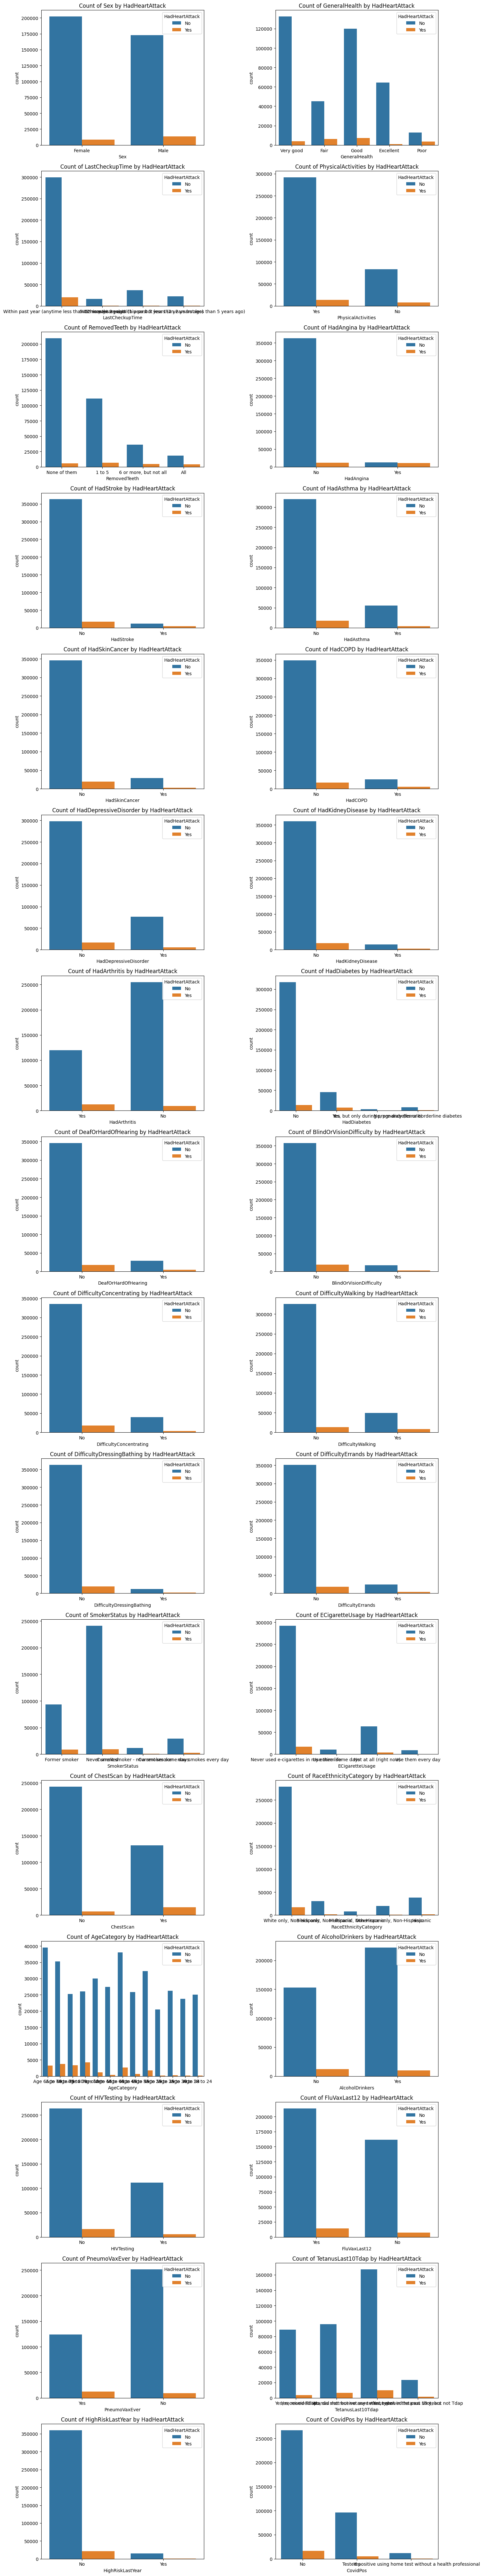

In [ ]:
categorical_columns = [
    'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth',
    'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
    'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes',
    'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating',
    'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
    'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
    'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
    'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'
]

# Set the number of rows and columns for subplots
n_cols = 2  # Number of columns for the subplot grid
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Loop through each categorical column and create a count plot
for i, column in enumerate(categorical_columns):
    sns.countplot(data=data_cleaned, x=column, hue='HadHeartAttack', ax=axes[i])
    axes[i].set_title(f'Count of {column} by HadHeartAttack')
    axes[i].legend(title='HadHeartAttack', loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()

Based on the crosstab analysis, we can conclude that:
1. Individuals with angina are much more likely to experience a heart attack.
2. Older individuals have a higher likelihood of experiencing a heart attack compared to younger age groups.
3. People identified as "white only, non-Hispanic" have a greater likelihood of having a heart attack than those in other racial categories
4. Those who have had a stroke are at an increased risk of having a heart attack

# ***Bivariate Analysis of numerical variable with respect to each other and our target variable***

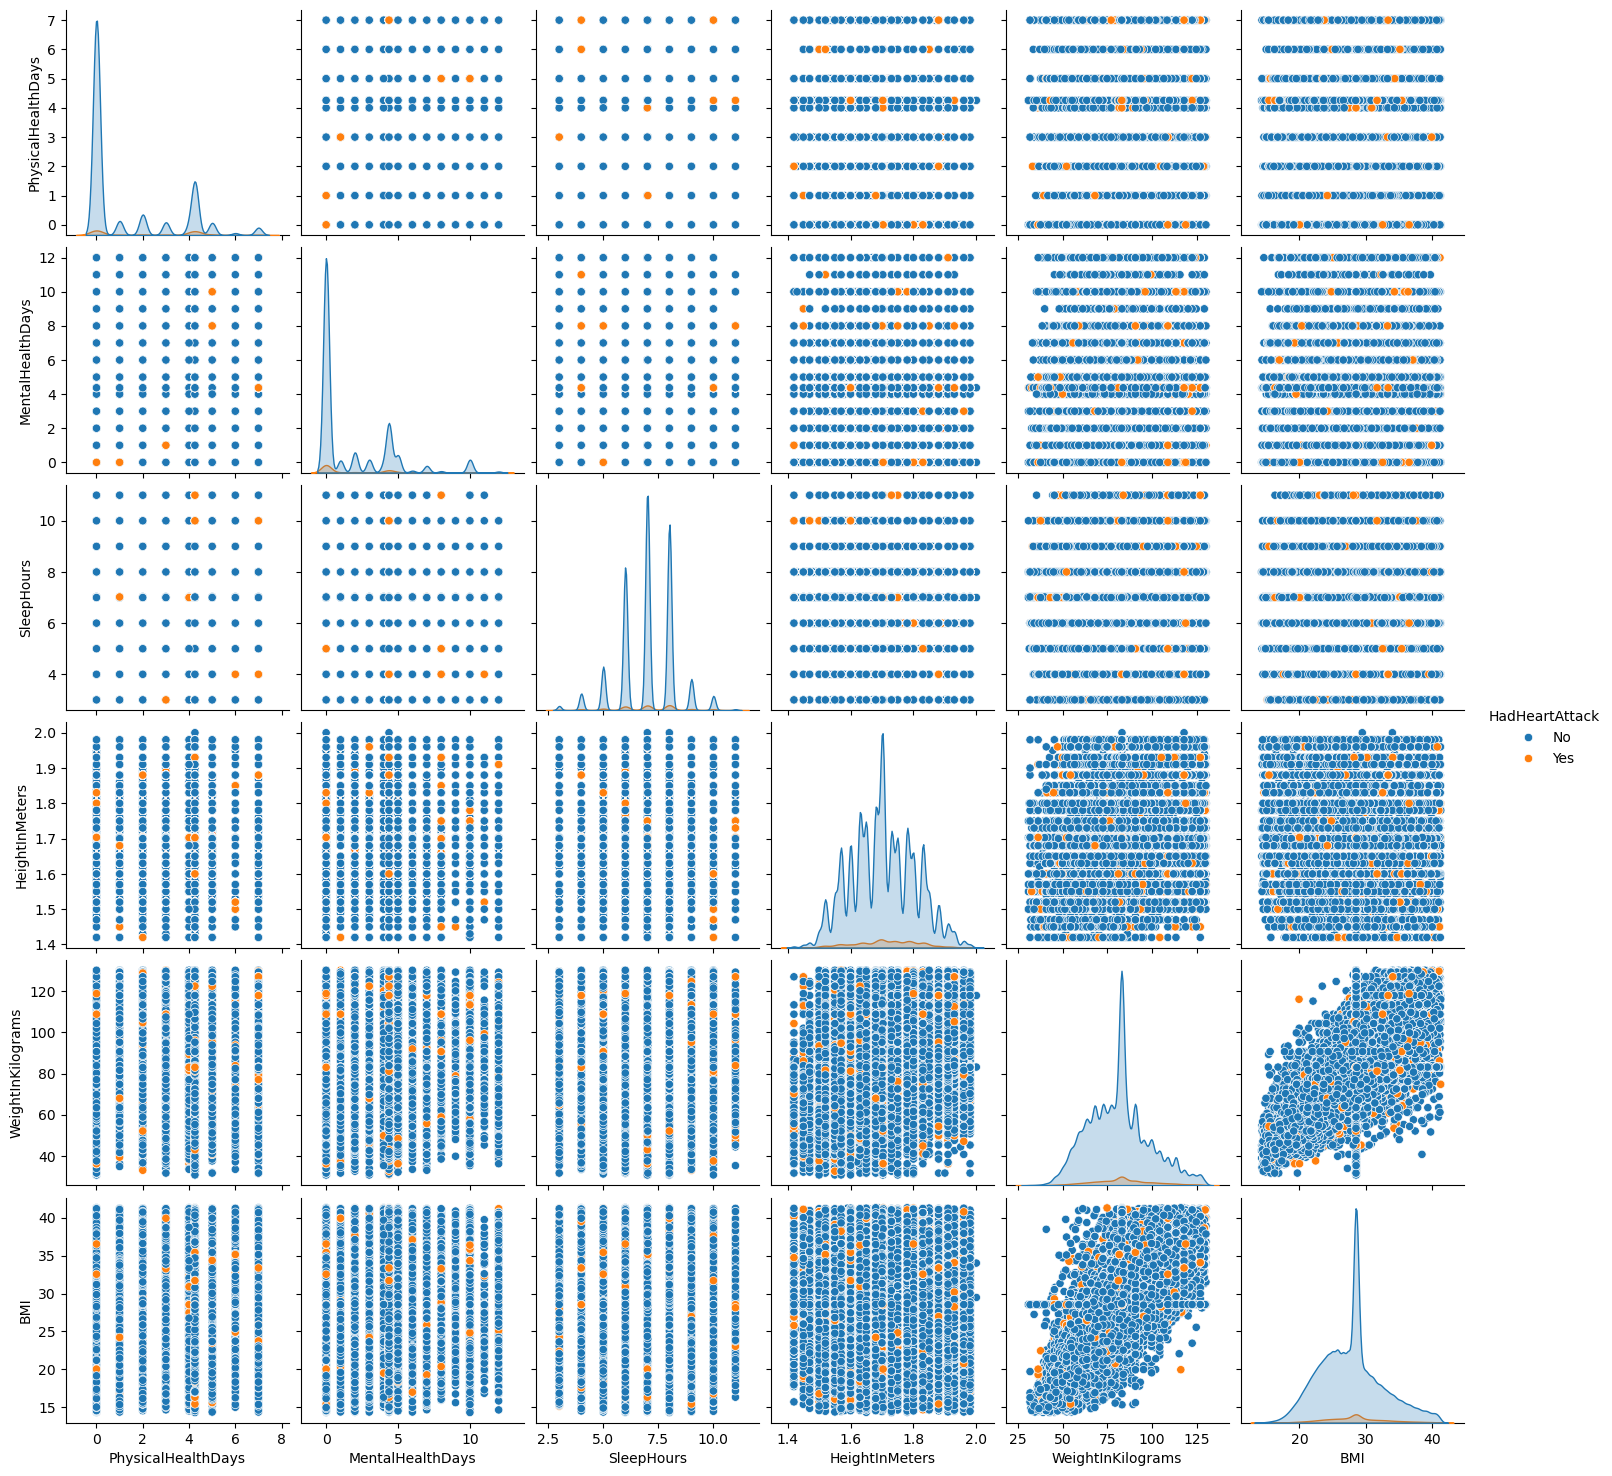

In [ ]:
sns.pairplot(data_cleaned, hue='HadHeartAttack')
plt.show()



The features 'SleepHours', 'WeightInKilograms', and 'BMI' appear to be normally distributed.

Additionally, we did not find any significant correlations between other features, except for the obvious positive correlation between BMI and WeightInKilograms.

# ***Violin Plot***

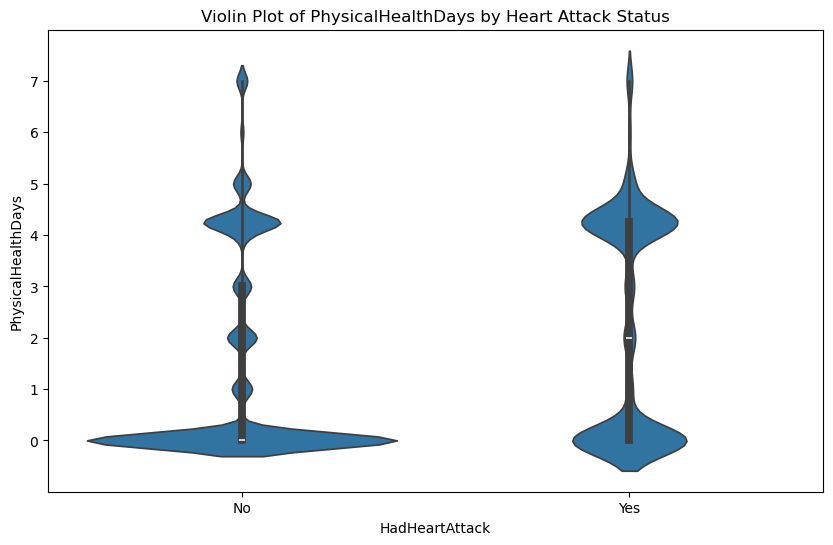

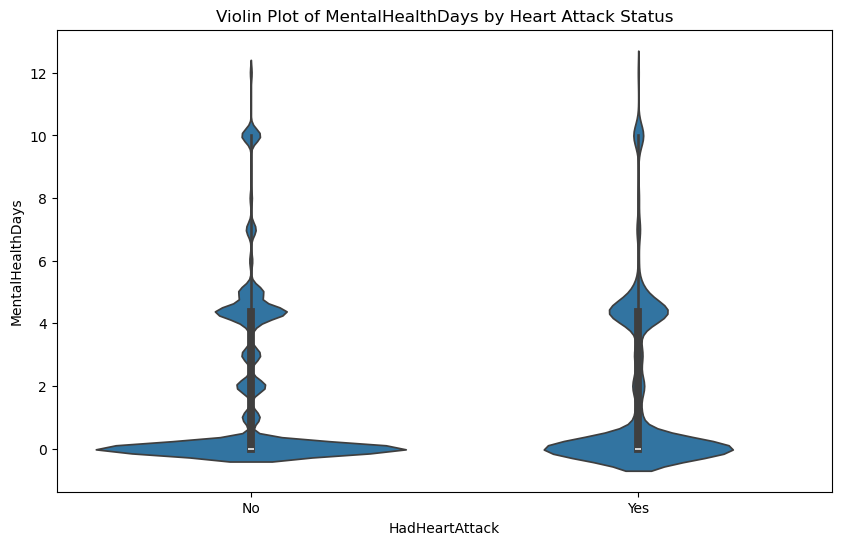

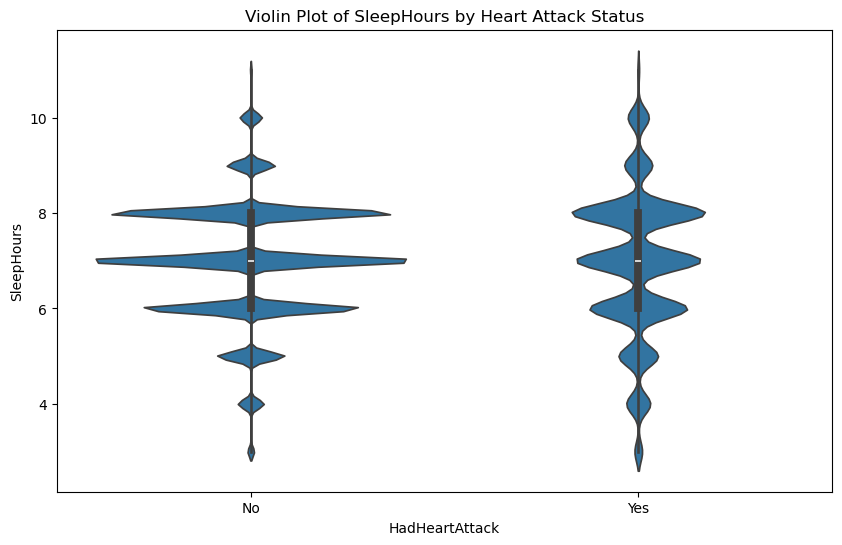

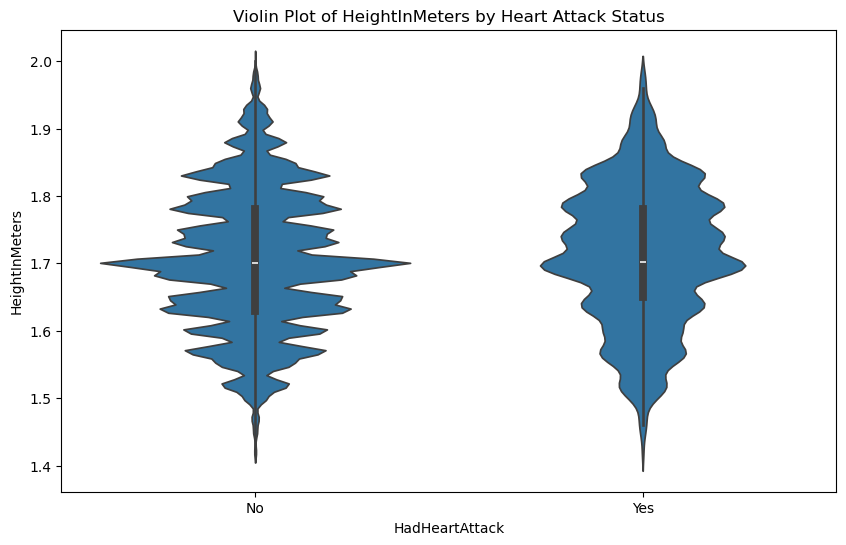

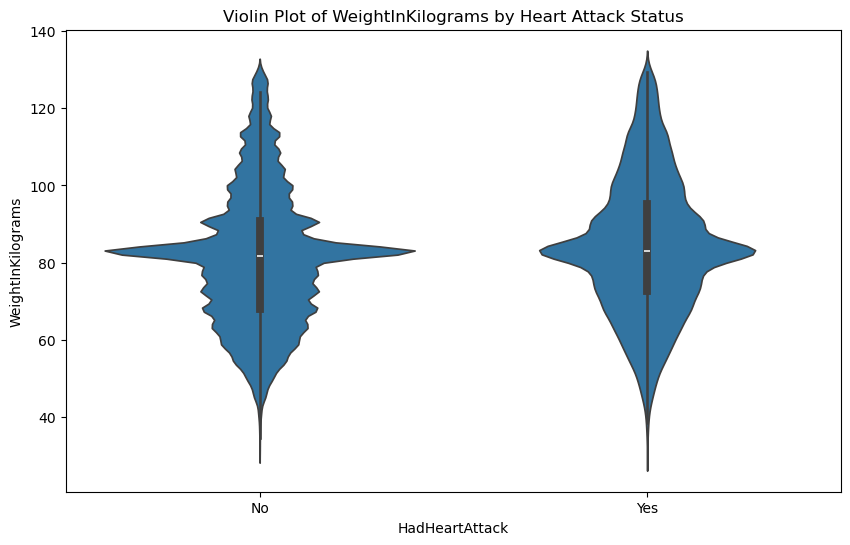

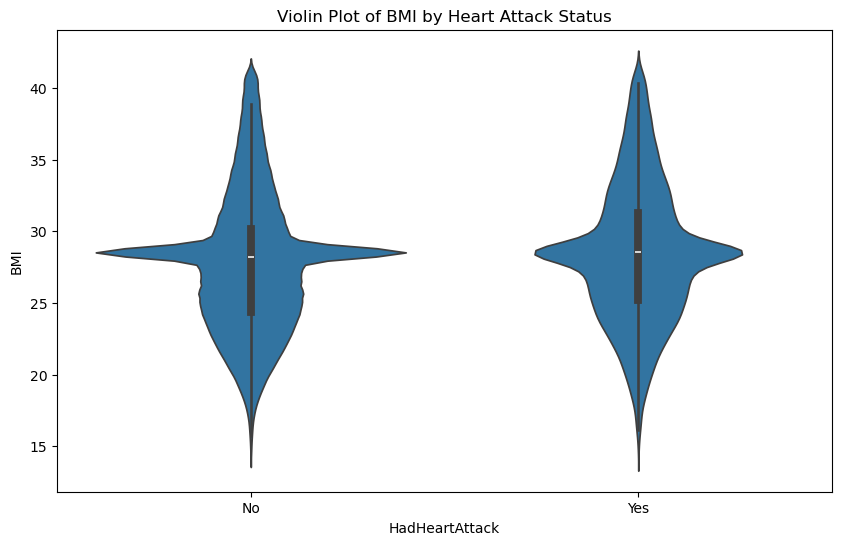

In [ ]:
numerical_columns = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
                     'HeightInMeters', 'WeightInKilograms', 'BMI']

# creating  a violin plot
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=data_cleaned, x='HadHeartAttack', y=col)
    plt.title(f'Violin Plot of {col} by Heart Attack Status')
    plt.show()

# ***Checking correlation between our numerical columns ***

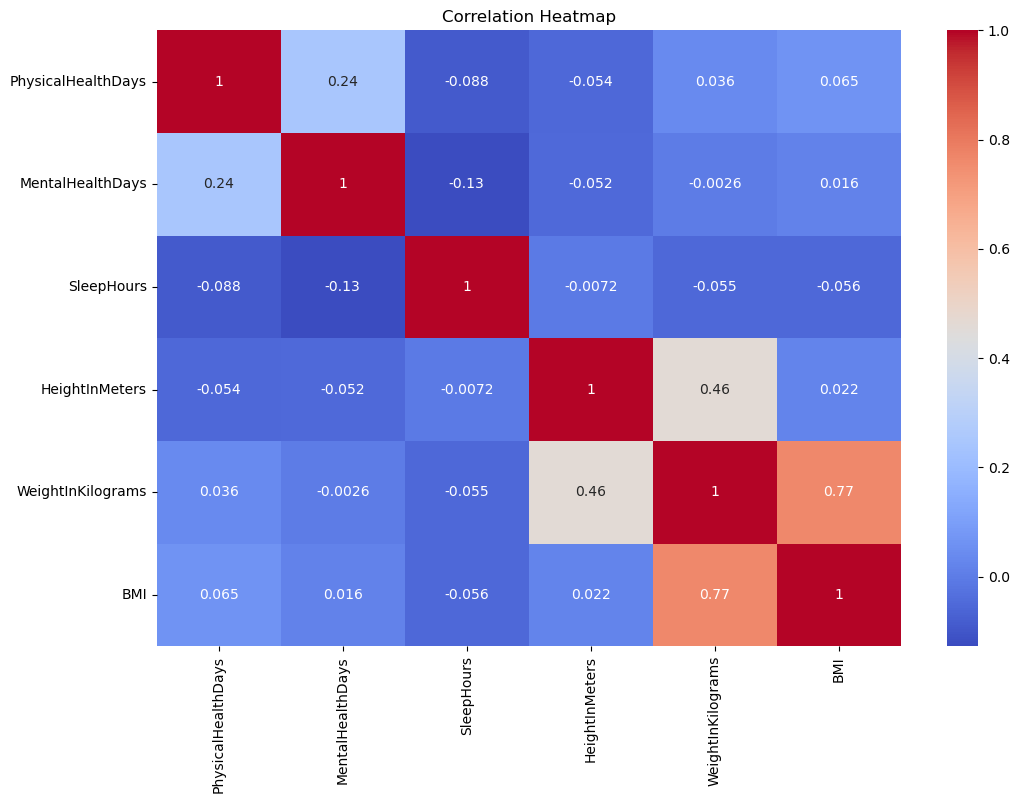

In [ ]:
# Select only numeric columns
numeric_data = data_cleaned.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



As we can observe, the features BMI and WeightInKilograms are highly correlated with each other, which is quite expected.

# ***Finding Correlation between our target variable and numerical columns***

Since our target variable is categorical, we are using biserial correlation instead of Pearson correlation for analysis

In [ ]:
from scipy.stats import pointbiserialr

# Encode binary target variable
data_cleaned['HadHeartAttack'] = data_cleaned['HadHeartAttack'].map({'Yes': 1, 'No': 0})

# Calculate point biserial correlation for each numerical column
for col in numeric_data.columns:
    correlation, _ = pointbiserialr(data_cleaned[col], data_cleaned['HadHeartAttack'])
    print(f"Point Biserial Correlation between {col} and HadHeartAttack: {correlation:.4f}")


Point Biserial Correlation between PhysicalHealthDays and HadHeartAttack: 0.0979
Point Biserial Correlation between MentalHealthDays and HadHeartAttack: -0.0071
Point Biserial Correlation between SleepHours and HadHeartAttack: -0.0070
Point Biserial Correlation between HeightInMeters and HadHeartAttack: 0.0230
Point Biserial Correlation between WeightInKilograms and HadHeartAttack: 0.0383
Point Biserial Correlation between BMI and HadHeartAttack: 0.0318


Therefore, we cannot conclude that our numerical columns are correlated with the target variable.